<IMG SRC="https://ucalgary.ca/themes/ucalgary/ucws_theme/images/UCalgary.svg" WIDTH=250 ALIGN="right">    </IMG>
## Plotting $\dot{V}O_2$ 

#### University of Calgary

In [11]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/demo-knes381/subject_1321.xlsx
/kaggle/input/demo-knes381/subject_1432.xlsx
/kaggle/input/demo-knes381/subject_1321.csv
/kaggle/input/demo-knes381/subject_1232.csv
/kaggle/input/demo-knes381/VO2_CSV.csv
/kaggle/input/demo-knes381/subject_1232.xlsx
/kaggle/input/demo-knes381/subject_1432.csv
/kaggle/input/demo-knes381/subject_1523.csv
/kaggle/input/demo-knes381/VO2_excel.xlsx
/kaggle/input/demo-knes381/subject_1523.xlsx


# Process subject 1321 #
 Aka change the code to process a different set of VO2 data
 

In [12]:
df = pd.read_csv('/kaggle/input/demo-knes381/subject_1321.csv', header=[0], skiprows=[1,2,3])

In [13]:
import matplotlib.pyplot as plt

# **MY CODE** #
## Plotting the FECO2 and VCO2 over VO2 ##
1. set up plot and variables
2. No need for numbering I commented my doings

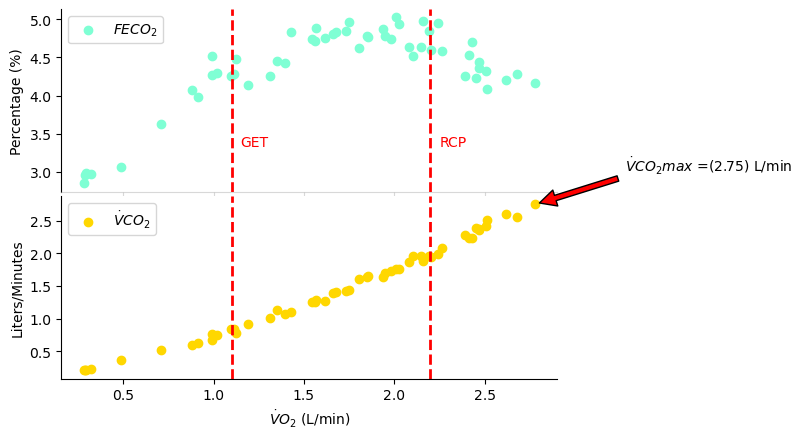

In [14]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt

fig, ax = plt.subplots(2, 1, sharex=True) # create subplots
fig.subplots_adjust(hspace=0.025) # Tis really the best values to not overlap Y-axis

# Assigning variables 
fe = df['FECO2']
co = df['VCO2']
o2 = df['VO2']

ax[0].scatter(o2, fe, color='aquamarine', label='$FECO_2$')
ax[0].spines[['right', 'top']].set_visible(False)
ax[0].spines['bottom'].set_color((0.7, 0.7, 0.7, 0.5)) 
ax[0].tick_params(axis='x', colors=(0.7, 0.7, 0.7, 0.5))
ax[0].set(ylabel=('Percentage (%)'))
ax[0].legend()

ax[1].scatter(o2, co, color='gold', label='$\dot VCO_2$')
ax[1].spines[['top', 'right']].set_visible(False)
ax[1].set(ylabel=('Liters/Minutes'))
ax[1].set(xlabel=('$\dot VO_2$ (L/min)'))
ax[1].legend()

# Add first Tideline
T1 = 1.1
ax[0].axvline(T1, color='red', linestyle='--', linewidth=2) 
ax[1].axvline(T1, color='red', linestyle='--', linewidth=2)
ax[0].text(T1 + 0.05, ax[0].get_ylim()[1] * 0.65, 'GET', color='red')

# Add second Tideline
T2 = 2.2
ax[0].axvline(T2, color='red', linestyle='--', linewidth=2) 
ax[1].axvline(T2, color='red', linestyle='--', linewidth=2)
ax[0].text(T2 + 0.05, ax[0].get_ylim()[1] * 0.65, 'RCP', color='red')

# Add max guy 
maxy = max(co)
maxx = o2[co.argmax()]
ax[1].annotate('$\dot VCO_2max$ =({}) L/min'.format(round(maxy, 2)), 
               xy=(maxx, maxy), xytext=(maxx + 0.5, maxy + 0.5),
               arrowprops=dict(facecolor='red', shrink= 0.05),
              )
# Save it 
fig.savefig("BensPythPlot.png", dpi=300, bbox_inches = "tight")
fig.show()